<a href="https://colab.research.google.com/github/laviniaflorentina/neural_networks_dissertation/blob/master/experiment1_baseline_simple_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Augmentation NN

https://machinelearningmastery.com/how-to-improve-deep-learning-model-robustness-by-adding-noise/

https://machinelearningmastery.com/handwritten-digit-recognition-using-convolutional-neural-networks-python-keras/

http://faroit.com/keras-docs/1.2.0/backend/




### Baseline Model with Multi-Layer Perceptrons Augmentation

NN - neural networks



Multi-Layer Perceptrons - forma primitiva de NN (putini neuroni si putine layere de neuroni)

Perceptron - 1 neuron / 1 node 

In [0]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

K.set_image_dim_ordering('th')

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)


def scale_data(images, labels, number_classes=100):
  # flatten 28*28 images to a 784 vector for each image
  # luam fiecare imagine si o strivim intr-un vector
  num_pixels = images.shape[-2] * images.shape[-1]
  scaled_images = images.reshape(images.shape[0], num_pixels).astype('float32')
  
  # normalize inputs from 0-255 to 0-1
  # importantfor NN - learn faster
  scaled_images = scaled_images / 255

  # one hot encode outputs
  scaled_labels = np_utils.to_categorical(labels, num_classes=number_classes)
  
  return scaled_images, scaled_labels

Using TensorFlow backend.


In [0]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# split test in validation + test
X_test, X_validation, y_test, y_validation = train_test_split(X_test, y_test, test_size=0.2, random_state=seed)

print("Train\t\t", X_train.shape, y_train.shape)
print("Validation\t", X_validation.shape, y_validation.shape)
print("Test\t\t", X_test.shape, y_test.shape)

11493376/11490434 [==============================] - 2s 0us/step
Train		 (60000, 28, 28) (60000,)
Validation	 (2000, 28, 28) (2000,)
Test		 (8000, 28, 28) (8000,)


5


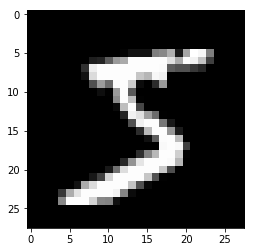

In [0]:
# show sample
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
print(y_train[0])

In [0]:
X_train, y_train = scale_data(images=X_train, labels=y_train)
X_validation, y_validation = scale_data(images=X_validation, labels=y_validation)
X_test, _ = scale_data(images=X_test, labels=y_test)

In [0]:
print("Train\t\t", X_train.shape, y_train.shape)
print("Validation\t", X_validation.shape, y_validation.shape)
print("Test\t\t", X_test.shape, y_test.shape)

Train		 (60000, 784) (60000, 100)
Validation	 (2000, 784) (2000, 100)
Test		 (8000, 784) (8000,)


In [0]:
# create model
model = Sequential()
model.add(Dense(X_train.shape[-1], input_dim=X_train.shape[-1], kernel_initializer='normal', activation='relu'))
model.add(Dense(y_train.shape[-1], kernel_initializer='normal', activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# printeaza cum arata modelul
model.summary()

# None - poate avea orice dimensiune - se refera la numarul de imagini (exemple)

W0825 03:28:34.264269 140142307116928 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0825 03:28:34.297963 140142307116928 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0825 03:28:34.304451 140142307116928 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4115: The name tf.random_normal is deprecated. Please use tf.random.normal instead.

W0825 03:28:34.329262 140142307116928 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0825 03:28:34.354103 140142307116928 deprecation_wrapper.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_2 (Dense)              (None, 100)               78500     
Total params: 693,940
Trainable params: 693,940
Non-trainable params: 0
_________________________________________________________________


In [0]:
history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), epochs=20, batch_size=200, verbose=1)

W0825 03:28:34.476541 140142307116928 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0825 03:28:34.522758 140142307116928 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 60000 samples, validate on 2000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 79us/step - loss: 0.3377 - acc: 0.9080 - val_loss: 0.1546 - val_acc: 0.9530
Epoch 2/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.1237 - acc: 0.9646 - val_loss: 0.0972 - val_acc: 0.9695
Epoch 3/20
60000/60000 [==============================] - 1s 21us/step - loss: 0.0804 - acc: 0.9770 - val_loss: 0.0829 - val_acc: 0.9755
Epoch 4/20
60000/60000 [==============================] - 1s 20us/step - loss: 0.0578 - acc: 0.9837 - val_loss: 0.0772 - val_acc: 0.9750
Epoch 5/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.0426 - acc: 0.9877 - val_loss: 0.0617 - val_acc: 0.9815
Epoch 6/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.0311 - acc: 0.9916 - val_loss: 0.0580 - val_acc: 0.9815
Epoch 7/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.0253 - acc: 0.9930 - val_loss: 0.0601 - val_acc:

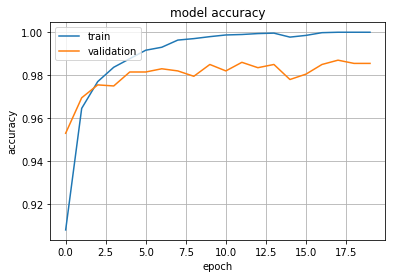

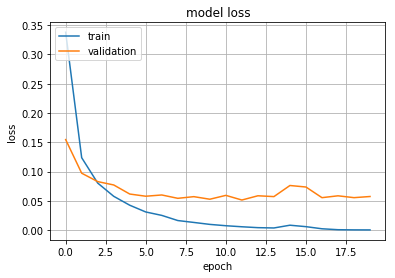

In [0]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.grid()
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [0]:
y_predicted = model.predict_classes(X_test)
y_predicted = np.array([number%10 for number in y_predicted])
accuracy = accuracy_score(y_test, y_predicted)

print("Accuracy ",accuracy)

Accuracy  0.98425
